In [ ]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

41

## Tile proportions

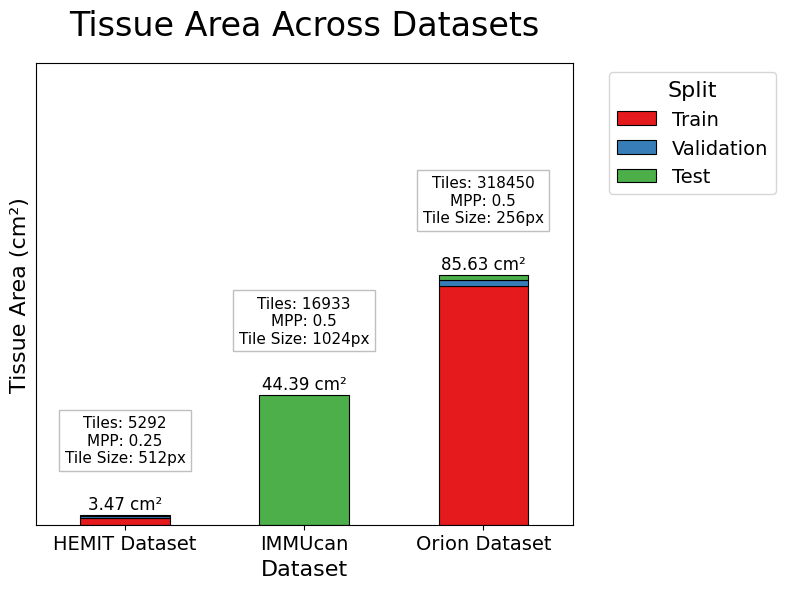

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'Dataset': ['Orion Dataset', 'Orion Dataset', 'Orion Dataset', 'HEMIT Dataset', 'HEMIT Dataset', 'HEMIT Dataset', 'IMMUcan'],
    'Split': ['Train', 'Validation', 'Test', 'Train', 'Validation', 'Test', 'Test'],
    'Tile_Area_cm': [81.81, 2.03, 1.79, 2.44, 0.41, 0.62, 44.39],
    'Tile_Count': [295096, 12402, 10952, 3717, 630, 945, 16933],
    'Tile_Size': [256, 256, 256, 512, 512, 512, 1024],
    'MPP': [0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5]  # Microns per pixel
}
df = pd.DataFrame(data)
df["Split"] = pd.Categorical(df["Split"], categories=["Train", "Validation", "Test"], ordered=True)

# Use seaborn's Set1 palette for distinct colors
palette = sns.color_palette("Set1", n_colors=len(df['Split'].unique()))
palette_dict = dict(zip(df['Split'].unique(), palette))

# Pivot data for stacked bar chart
df_pivot = df.pivot(index="Dataset", columns="Split", values="Tile_Area_cm").fillna(0)

# Plot stacked bars
fig, ax = plt.subplots(figsize=(8, 6))
df_pivot.plot(kind="bar", stacked=True, color=[palette_dict[c] for c in df_pivot.columns], ax=ax, edgecolor='black', linewidth=0.8)

# Remove y-axis ticks since values are displayed on top of bars
ax.set_yticks([])

# Adjust font sizes to match the large title
plt.ylabel("Tissue Area (cm²)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
plt.title("Tissue Area Across Datasets", fontsize=24, pad=20)

# Adjust legend
plt.legend(title="Split", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Collect dataset details for annotation (Total Tiles, MPP, Tile Size)
dataset_info = df.groupby("Dataset").agg(
    Total_Tiles=("Tile_Count", "sum"),
    MPP=("MPP", "first"),
    Tile_Size=("Tile_Size", "first")
).reset_index()

# Add tissue area values on top of bars
for i, dataset in enumerate(df_pivot.index):
    total_height = df_pivot.loc[dataset].sum()
    ax.text(i, total_height + 2, f"{total_height:.2f} cm²", ha='center', fontsize=12, color='black')

# Add dataset details above bars (legend style: gray, not bold, slightly above tissue area values)
for i, row in dataset_info.iterrows():
    dataset_name = row["Dataset"]
    total_tiles = row["Total_Tiles"]
    mpp = row["MPP"]
    tile_size = row["Tile_Size"]
    
    # Find the total height of the stacked bar for placement
    total_height = df_pivot.loc[dataset_name].sum()
    
    # Annotation position (higher above the tissue area count for better spacing)
    ax.text(i, total_height + 18, f"Tiles: {total_tiles}\nMPP: {mpp}\nTile Size: {tile_size}px",
            ha='center', fontsize=11, color='black', bbox=dict(facecolor="white", alpha=0.5, edgecolor="gray"))

# Adjust x-axis ticks and layout
plt.xticks(rotation=0, fontsize=14)
plt.ylim(0, df_pivot.max().sum() + 30)  # More spacing for annotations
plt.tight_layout()
#plt.savefig("/root/workdir/figure/tile_info_plot.svg", format="svg", bbox_inches="tight")

plt.show()


## Cell counts

In [3]:
from pathlib import Path
from tqdm import tqdm
import pandas as pd


train_nuclei_csv_fns = [str(fn) for fn in Path("/root/workdir/HEMIT_dataset/train/csv").glob("*.csv")]

train_hemit_sum_dict = {"Pan-CK_pos": 0, "CD3e_pos": 0, "Total_Cells": 0}
for nuclei_csv_fn in tqdm(train_nuclei_csv_fns, total=len(train_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=["Pan-CK_pos", "CD3_pos"])
    sum_dict_tile = df_nuclei.sum().to_dict()
    train_hemit_sum_dict["Pan-CK_pos"] += sum_dict_tile["Pan-CK_pos"]
    train_hemit_sum_dict["CD3e_pos"] += sum_dict_tile["CD3_pos"]
    train_hemit_sum_dict["Total_Cells"] += len(df_nuclei)

val_nuclei_csv_fns = [str(fn) for fn in Path("/root/workdir/HEMIT_dataset/val/csv").glob("*.csv")]

val_hemit_sum_dict = {"Pan-CK_pos": 0, "CD3e_pos": 0, "Total_Cells": 0}
for nuclei_csv_fn in tqdm(val_nuclei_csv_fns, total=len(val_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=["Pan-CK_pos", "CD3_pos"])
    sum_dict_tile = df_nuclei.sum().to_dict()
    val_hemit_sum_dict["Pan-CK_pos"] += sum_dict_tile["Pan-CK_pos"]
    val_hemit_sum_dict["CD3e_pos"] += sum_dict_tile["CD3_pos"]
    val_hemit_sum_dict["Total_Cells"] += len(df_nuclei)

test_nuclei_csv_fns = [str(fn) for fn in Path("/root/workdir/HEMIT_dataset/test/csv").glob("*.csv")]

test_hemit_sum_dict = {"Pan-CK_pos": 0, "CD3e_pos": 0, "Total_Cells": 0}
for nuclei_csv_fn in tqdm(test_nuclei_csv_fns, total=len(test_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=["Pan-CK_pos", "CD3_pos"])
    sum_dict_tile = df_nuclei.sum().to_dict()
    test_hemit_sum_dict["Pan-CK_pos"] += sum_dict_tile["Pan-CK_pos"]
    test_hemit_sum_dict["CD3e_pos"] += sum_dict_tile["CD3_pos"]
    test_hemit_sum_dict["Total_Cells"] += len(df_nuclei)

100%|██████████| 930/930 [00:01<00:00, 594.06it/s]


In [ ]:
columns_pos = [
    'CD31_pos', 'CD45_pos', 'CD68_pos', 'CD4_pos', 'FOXP3_pos',
    'CD8a_pos', 'CD45RO_pos', 'CD20_pos', 'PD-L1_pos', 'CD3e_pos',
    'CD163_pos', 'E-cadherin_pos', 'PD-1_pos', 'Ki67_pos', 'Pan-CK_pos',
    'SMA_pos']
slide_dataframe = pd.read_csv("/root/workdir/data/slide_dataframe.csv")
test_slides = ['19510_C11_US_SCAN_OR_001__151039-registered.ome',
                '18459_LSP10364_US_SCAN_OR_001__092347-registered.ome']
val_slides = ['19510_C19_US_SCAN_OR_001__153041-registered.ome',
                '19510_C30_US_SCAN_OR_001__155702-registered.ome']
train_nuclei_csv_fns = slide_dataframe[~slide_dataframe["in_slide_name"].isin(val_slides + test_slides)]["nuclei_csv_path"].tolist()
val_nuclei_csv_fns = slide_dataframe[slide_dataframe["in_slide_name"].isin(val_slides)]["nuclei_csv_path"].tolist()
test_nuclei_csv_fns = slide_dataframe[slide_dataframe["in_slide_name"].isin(test_slides)]["nuclei_csv_path"].tolist()
len(train_nuclei_csv_fns), len(val_nuclei_csv_fns), len(test_nuclei_csv_fns)


train_orion_sum_dict = {col: 0 for col in columns_pos}
train_orion_sum_dict["Total_Cells"] = 0
for nuclei_csv_fn in tqdm(train_nuclei_csv_fns, total=len(train_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=columns_pos)
    sum_dict_tile = df_nuclei.sum().to_dict()
    for col in columns_pos:
        train_orion_sum_dict[col] += sum_dict_tile[col]
    train_orion_sum_dict["Total_Cells"] += len(df_nuclei)

val_orion_sum_dict = {col: 0 for col in columns_pos}
val_orion_sum_dict["Total_Cells"] = 0
for nuclei_csv_fn in tqdm(val_nuclei_csv_fns, total=len(val_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=columns_pos)
    sum_dict_tile = df_nuclei.sum().to_dict()
    for col in columns_pos:
        val_orion_sum_dict[col] += sum_dict_tile[col]
    val_orion_sum_dict["Total_Cells"] += len(df_nuclei)

test_orion_sum_dict = {col: 0 for col in columns_pos}
test_orion_sum_dict["Total_Cells"] = 0
for nuclei_csv_fn in tqdm(test_nuclei_csv_fns, total=len(test_nuclei_csv_fns)):
    df_nuclei = pd.read_csv(nuclei_csv_fn, usecols=columns_pos)
    sum_dict_tile = df_nuclei.sum().to_dict()
    for col in columns_pos:
        test_orion_sum_dict[col] += sum_dict_tile[col]
    test_orion_sum_dict["Total_Cells"] += len(df_nuclei)

100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


In [7]:
df_immucan = pd.read_csv("/root/workdir/Immucan_tiles/dataframe_tile.csv",
                         usecols=["CD4_count", "Pan-CK_count", "CD3_count", "CD8_count", "FOXP3_count"])
df_immucan = df_immucan.rename(columns={
    "CD4_count": "CD4_pos", "Pan-CK_count": "Pan-CK_pos", "CD3_count": "CD3e_pos", "CD8_count": "CD8a_pos",
    "FOXP3_count": "FOXP3_pos"})
test_immucan_sum_dict = df_immucan.sum().to_dict()
test_immucan_sum_dict["Total_Cells"] = pd.read_csv("/root/workdir/Immucan_tiles/dataframe_tile.csv")[["Pan-CK_count", "CD3_count", "CD56_count"]].sum().sum() * 2

In [8]:
# Define all possible markers
all_markers = [
    'CD31', 'CD45', 'CD68', 'CD4', 'FOXP3', 'CD8a', 'CD45RO', 'CD20',
    'PD-L1', 'CD3e', 'CD163', 'E-cadherin', 'Ki67', 'Pan-CK', 'SMA'
]

# Define dataset names and corresponding dictionaries
datasets = {
    "HEMIT": {
        "Train": train_hemit_sum_dict,
        "Validation": val_hemit_sum_dict,
        "Test": test_hemit_sum_dict
    },
    "Orion": {
        "Train": train_orion_sum_dict,
        "Validation": val_orion_sum_dict,
        "Test": test_orion_sum_dict
    },
    "IMMUcan": {
        "Test": test_immucan_sum_dict
    }
}

# Initialize list to store formatted data
data_list = []

# Process each dataset and subset
for dataset, subsets in datasets.items():
    for subset, marker_counts in subsets.items():
        # Ensure all markers are present in each subset
        formatted_data = {marker + "+": marker_counts.get(marker + "_pos", 0) for marker in all_markers}
        
        # Compute Total Cell Count (not summing over markers to avoid overcounting)
        formatted_data["Total_Cell_Count"] = marker_counts.get("Total_Cells", 0)  # Assuming the key exists in marker_counts
        
        # Add dataset and subset labels
        formatted_data["Dataset"] = dataset
        formatted_data["Subset"] = subset
        data_list.append(formatted_data)

# Convert to DataFrame
df = pd.DataFrame(data_list)


/tmp/ipykernel_18360/4199188510.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_melted.pivot_table(index=["Dataset_Subset"], columns="Marker", values="Proportion", fill_value=0)
/tmp/ipykernel_18360/4199188510.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_counts = df_melted.pivot_table(index=["Dataset_Subset"], columns="Marker", values="Cell_Count", fill_value=0)
/tmp/ipykernel_18360/4199188510.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

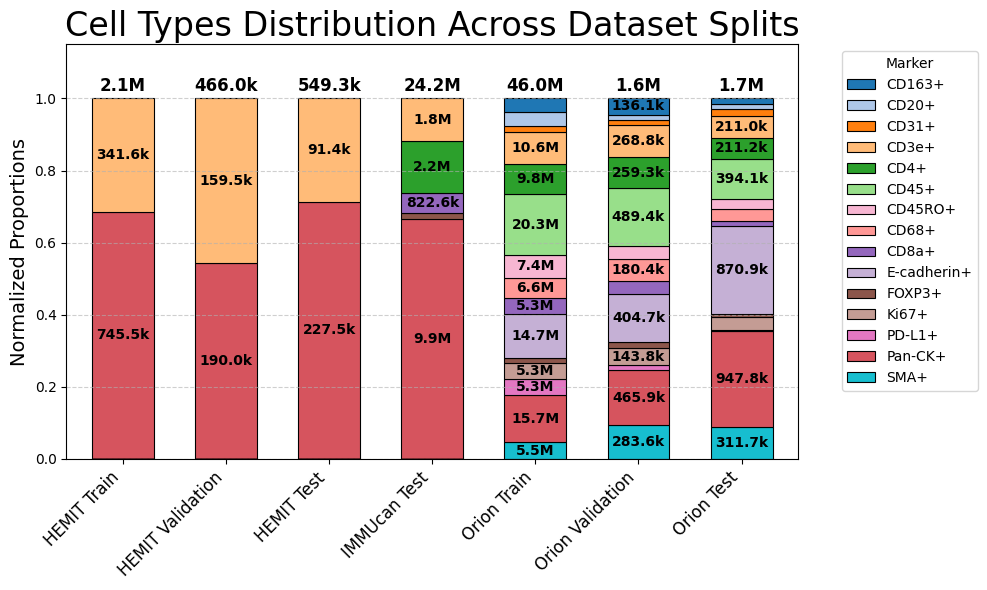

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of bars
desired_order = [
    "HEMIT Train", "HEMIT Validation", "HEMIT Test",
    "IMMUcan Test",
    "Orion Train", "Orion Validation", "Orion Test"
]

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=["Dataset", "Subset", "Total_Cell_Count"], var_name="Marker", value_name="Cell_Count")

# Calculate proportions per dataset/subset
df_melted['Proportion'] = df_melted.groupby(["Dataset", "Subset"])["Cell_Count"].transform(lambda x: x / x.sum())

# Create combined "Dataset_Subset" column and set categorical order
df_melted["Dataset_Subset"] = df_melted["Dataset"] + " " + df_melted["Subset"]
df_melted["Dataset_Subset"] = pd.Categorical(df_melted["Dataset_Subset"], categories=desired_order, ordered=True)

# Pivot for 100% Stacked Bar Plot
df_pivot = df_melted.pivot_table(index=["Dataset_Subset"], columns="Marker", values="Proportion", fill_value=0)
df_counts = df_melted.pivot_table(index=["Dataset_Subset"], columns="Marker", values="Cell_Count", fill_value=0)

# Ensure correct dataset ordering
df_pivot = df_pivot.reindex(desired_order)
df_counts = df_counts.reindex(desired_order)

# Reverse the order of markers for correct legend alignment
df_pivot = df_pivot[df_pivot.columns[::-1]]
df_counts = df_counts[df_counts.columns[::-1]]

# Extract correct total cell count directly from the original DataFrame
df_total_cells = df_melted.groupby("Dataset_Subset")["Total_Cell_Count"].first().reindex(desired_order)

# ------------------- 100% STACKED BAR PLOT -------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for markers using seaborn palette
palette = sns.color_palette("tab20", n_colors=len(df_pivot.columns))
palette[6] = (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)  # Custom color swap
palette[13] = (0.8392156862745098, 0.3294117647058825, 0.368627450980392)
palette[-1] = (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)
palette = palette[::-1]  # Reverse color order to match stacking

# Plot stacked bars
bars = df_pivot.plot(kind="bar", stacked=True, color=palette, ax=ax, edgecolor="black", linewidth=0.8, width=0.6)

# Formatting
plt.title("Cell Types Distribution Across Dataset Splits", fontsize=24)  # Added padding for clarity
#plt.xlabel("Dataset & Subset", fontsize=14)
plt.xlabel("")
plt.ylabel("Normalized Proportions", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Reverse legend order to match stacked order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Marker", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.ylim(0, 1.15)  # Increased y-limit to fit total cell counts
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Function to format counts (round to 2 decimals + k/M notation)
def format_count(value):
    if value >= 1_000_000:
        return f"{round(value / 1_000_000, 1)}M"
    elif value >= 1_000:
        return f"{round(value / 1_000, 1)}k"
    else:
        return str(round(value, 1))

# Add text inside bars for cell counts if the proportion is large enough
for i, dataset_subset in enumerate(df_pivot.index):
    bottom = 0  # Tracks cumulative bottom position for stacking
    for marker in df_pivot.columns:
        proportion = df_pivot.loc[dataset_subset, marker]
        count = df_counts.loc[dataset_subset, marker]

        if proportion > 0.04:  # Display count only if the proportion is larger than 4%
            ax.text(i, bottom + proportion / 2, format_count(count), ha='center', va='center',
                    fontsize=10, fontweight="bold", color="black")

        bottom += proportion  # Move to next stacked section

# Add correct total cell count on top of each bar using the correct column
for i, dataset_subset in enumerate(df_pivot.index):
    if dataset_subset in df_total_cells:
        total_count = df_total_cells.loc[dataset_subset]
        ax.text(i, 1.01, format_count(total_count), ha='center', va='bottom',
            fontsize=12, fontweight="bold", color="black")

plt.tight_layout()
#plt.savefig("/root/workdir/figure/celltype_info_plot.svg", format="svg", bbox_inches="tight")
plt.show()
